##                                         Cyclone Analyzer

##### Import necessory libraries

In [1]:
from PIL import Image
import math
import cv2
import matplotlib.pyplot as plt

##### Measurement of Image

In [2]:
img1 = Image.open('1.jpg')
width,height = img1.size
print('width =',width,'height =',height)

width = 940 height = 626


##### Detection of locations/dots

Following functions detect if it is a circle (red/green/blue) or not at current location

In [3]:
def is_circle1(img_data,x,y):
    count=0
    for i in range(8):
        for j in range(8):
            if img_data[x+i,y+j] :
                count = count +1
    
    return count>20

def is_circle2(img_data,x,y):
    count=0
    for i in range(8):
        for j in range(8):
            if img_data[x-i,y-j] :
                count = count +1
    

    return count>20
        

This function "detect_points" takes three arguments image, color of dot which is to detect, and number of dots. 

In [4]:
def detect_points(img,color,n):
    height,width,channel = img.shape
    # print(width,height)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # HSV constrain for red color
    if color=='red':
        range1 = cv2.inRange(img_hsv, (0,50,20), (5,255,255))
        range2 = cv2.inRange(img_hsv, (175,50,20), (180,255,255))
        img1_data = cv2.bitwise_or(range1, range2 )

    # HSV constrain for green color
    if color=='green':
        img1_data = cv2.inRange(img_hsv, (50, 100, 100), (70, 255, 255))

    # HSV constrain for blue color
    if color=='blue':
        img1_data = cv2.inRange(img_hsv, (110,50,50), (130,255,255))
        

    # It detects left top first point of circle/dot
    listofp1 = []
    flag=n
    k=0

    for i in range(width):
        for j in range(height):
            if i+k>=width :
                flag=0
                break
            if img1_data[j,i+k] and is_circle1(img1_data,j,i+k):
                flag=flag-1
                # print(i+k,j)
                listofp1.append((j,i+k))
                k=10*(n-flag)
                break
        if flag==0:
            break
    
    # print(listofp1)
    

    # It detects right bottem first point of circle/dot
    listofp2 = []
    flag=n
    k=0
    for i in range(width):
        for j in range(height):
            if i-k<0 :
                flag=0
                break
            if img1_data[height-1-j,width-1-i-k] and is_circle2(img1_data,height-1-j,width-1-i-k):
                flag=flag-1
                # print(i+k,j)
                listofp2.append((height-1-j,width-1-i-k))
                k=10*(n-flag)
                break
        if flag==0:
            break

    listofp2.reverse()
    # print(listofp2)

    # It Calculates center of circle, mid point of a diameter, diameter points are stored in "listofp1" and "listofp2"
    ans = []
    for i in range(len(listofp1)):
        ans.append(((listofp1[i][1]+listofp2[i][1])/2,(listofp1[i][0]+listofp2[i][0])/2))
    
    return ans

Following cell collects all relevant points using/calling above "detect_points" function from all images(1.jpg,2.jpg,3.jpg)

In [5]:
img1 = cv2.imread("1.jpg")
points_r1 = detect_points(img1,'red',2) 
belna_p1=points_r1[0]
ambali_p1=points_r1[1] 

img2 = cv2.imread("2.jpg")
points_r2 = detect_points(img2,'red',2) 
belna_p2=points_r2[0]
ambali_p2=points_r2[1]

img3 = cv2.imread("3.jpg")
points_r3 = detect_points(img3,'red',2) 
belna_p3=points_r3[0]
ambali_p3=points_r3[1] 

points_b = detect_points(img1,'blue',2) 
Mauritius=points_b[0]
Reunion=points_b[1] 

print('Mauritius:',Mauritius)
print('Reunion:',Reunion)

points_g = detect_points(img1,'green',3) 

Benonoka=points_g[0]
Antananarivo=points_g[1]
Antsiranana=points_g[2]

print('Antananarivo:' ,Antananarivo)
print('Antsiranana:' ,Antsiranana)
print('Benonoka:' ,Benonoka)

print('belna_p1:',belna_p1,'ambali_p1:',ambali_p1)
print('belna_p2:',belna_p2,'ambali_p2:',ambali_p2)
print('belna_p3:',belna_p3,'ambali_p3:',ambali_p3)

Mauritius: (362.5, 498.5)
Reunion: (416.0, 474.5)
Antananarivo: (139.5, 436.5)
Antsiranana: (200.5, 267.5)
Benonoka: (94.5, 617.5)
belna_p1: (238.5, 113.5) ambali_p1: (546.5, 180.5)
belna_p2: (223.5, 121.5) ambali_p2: (539.5, 188.5)
belna_p3: (216.5, 133.5) ambali_p3: (528.5, 195.5)


##### Assumptions

1. Both cyclones continue alont the same route (straight line) after the last satellite image capture.
2. Both cyclones move with constant velocity/speed after the last satellite image capture.
3. The distance ratio of px to km is approximated by simply taking average. (Earth is Spherical but Image is flat) 

##### Equation of lines and Point of Intersection
y = -1.714286*x + 504.642857        and 
     y = -0.636364*x + 531.818182

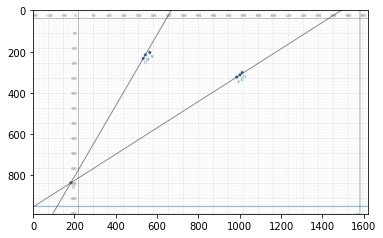

In [6]:
fig1 = Image.open('figure1.jpg')
plt.imshow(fig1)

In [7]:
# Point of intersection
poi = (-25.211,547.861) 
print('Point of Intersection:',poi)

Point of Intersection: (-25.211, 547.861)


##### Average Distance Ratio of Pixel to Km

Pixel distance btween Antsiranana and Benonoka.
Given distance = 1500km

In [8]:
px_dist_AntBen = math.sqrt((Antsiranana[0]-Benonoka[0])**2 +(Antsiranana[1]-Benonoka[1])**2)
print(px_dist_AntBen)
given_dist_AntBen =1500 

365.6993300513415


Distance Ratio of Pixel to Km

In [9]:
one_px_AntBen = given_dist_AntBen/px_dist_AntBen
print(one_px_AntBen)

4.101730237759558


Pixel distance btween Mauritius and Reunion.
Given distance = 250km

In [10]:
px_dist_MurRun = math.sqrt((Mauritius[0]-Reunion[0])**2 +(Mauritius[1]-Reunion[1])**2)
print(px_dist_MurRun)
given_dist_MurRun =250

58.63659267044769


Distance Ratio of Pixel to Km

In [11]:
one_px_MurRun = given_dist_MurRun/px_dist_MurRun
print(one_px_MurRun)

4.263549238016992


Average Distance Ratio

In [12]:
avg_ratio = (one_px_AntBen+one_px_MurRun)/2
print('Average Ratio:',avg_ratio)

Average Ratio: 4.182639737888275


##### Speed of Cyclones

Time Interval between Second and third image

In [13]:
# time on 2.jpg = 14:44am
# time on 3.jpg = 15:39am
# difference of 55 min = 55x60 sec
time_interval = 55*60
print(time_interval,"Seconds")

3300 Seconds


Speed of belna

In [14]:
# Distance travelled by belna in 55 min
belna_px_dist_p2top3 = math.sqrt((belna_p2[0]-belna_p3[0])**2 +(belna_p2[1]-belna_p3[1])**2)
belna_real_dist_p2top3 = belna_px_dist_p2top3*avg_ratio

# print(belna_px_dist_p2p3)
# print(belna_real_dist_p2p3)
belna_speed = belna_real_dist_p2top3*1000/time_interval
print(belna_speed,'m/s')

17.60820857171511 m/s


Speed of Ambali

In [15]:
# Distance travelled by ambali in 55 min
ambali_px_dist_p2top3 = math.sqrt((ambali_p2[0]-ambali_p3[0])**2 +(ambali_p2[1]-ambali_p3[1])**2)
ambali_real_dist_p2top3 = ambali_px_dist_p2top3*avg_ratio

# print(ambali_px_dist_p2p3)to
# print(ambali_real_dist_p2p3)
ambali_speed = ambali_real_dist_p2top3*1000/time_interval
print(ambali_speed,'m/s')

16.525742448083285 m/s


##### Distance between capital Antananarivo and Point of Intersection

In [16]:
px_dist_capital_to_poi = math.sqrt((Antananarivo[0]-poi[0])**2 +(Antananarivo[1]-poi[1])**2)
real_dist_capital_to_poi = px_dist_capital_to_poi*avg_ratio

print(real_dist_capital_to_poi,'km')

831.6091933917693 km


##### Time taken to reach point of intersection by each cyclone

Time taken by cyclone Belna

In [17]:
# Distance between third point of belna and point of intersection 
belna_px_dist_p3topoi = math.sqrt((belna_p3[0]-poi[0])**2 +(belna_p3[1]-poi[1])**2)
belna_real_dist_p3topoi = belna_px_dist_p3topoi*avg_ratio

# print(belna_px_dist_p3topoi,'km')
# print(belna_real_dist_p3topoi,'km')
belna_time_taken = belna_real_dist_p3topoi*1000/belna_speed
print(int(belna_time_taken),'Seconds')
print(int(belna_time_taken/3600),'Hour and',int((belna_time_taken%3600)/60),'Min')

113949 Seconds
31 Hour and 39 Min


Time taken by cyclone Ambali

In [18]:
# Distance between third point of ambali and point of intersection 
ambali_px_dist_p3topoi = math.sqrt((ambali_p3[0]-poi[0])**2 +(ambali_p3[1]-poi[1])**2)
ambali_real_dist_p3topoi = ambali_px_dist_p3topoi*avg_ratio

# print(ambali_px_dist_p3topoi,'km')
# print(ambali_real_dist_p3topoi,'km')
ambali_time_taken = ambali_real_dist_p3topoi*1000/ambali_speed
print(int(ambali_time_taken),'Seconds')
print(int(ambali_time_taken/3600),'Hour and',int((ambali_time_taken%3600)/60),'Min')

166113 Seconds
46 Hour and 8 Min


##### Final Answer

The apojuncture for Belna-Ambali will be 831.61km away from the capital city Antananarivo.

The cyclone Belna is reaching at point of intersection 31 hour and 39 min after the last satellite image capture and the cyclone Ambali is reaching at point of intersection 46 hour and 8 min after the last satellite image capture.  

Clearly they will not collide in reality.